#Combining the req_pidn_query + CSF_Amyloid

In [ ]:
import pandas as pd 

CSFdata = pd.read_excel("/content/.xlsx")
reqdata = pd.read_excel("/content/.xls")

#there are random values at the bottom of the csv that make it longer w lots of nan
reqdata = reqdata[:422]

In [ ]:
!pip install --upgrade xlrd

In [ ]:
# are they the same type?
print(type(reqdata["PIDN"][2]))

In [ ]:
# what are the differences in these age columns? is there an overlap that can be seen here?
for i in range(len(CSFdata)):
  if str(CSFdata["Age.1"][i]) != "nan" and str(CSFdata["Age.2"][i]) != "nan" :
    print("overlap")

In [ ]:
wave2 = CSFdata[CSFdata["Wave_Num"] == 2]

In [ ]:
#create a wave column for the special cases
for i in range(len(CSFdata)):
  samplenum = CSFdata["Sample"][i]
  if type(samplenum) == str:
    oldsamplenum = samplenum
    CSFdata.at[i,"Wave_Num"] = 2
    cutsample = samplenum[:samplenum.find("Wave")]
    while cutsample[0] == "0":
      cutsample = cutsample[1:]
    CSFdata.at[i,"PIDN"] = int(cutsample)
  else:
    CSFdata.at[i,"Wave_Num"] = 1
    CSFdata.at[i,"PIDN"] = int(samplenum)


In [ ]:
sum = 0
for entry in CSFdata["PIDN"]:
  if entry not in reqdata["PIDN"]:
    sum +=1
    print(entry)

In [ ]:
sum2 = 0
for entry in reqdata["PIDN"]:
  if entry not in CSFdata["PIDN"]:
    sum2 +=1

In [ ]:
reqdata

In [ ]:
mergedDF = pd.merge(CSFdata, reqdata, on='PIDN')

In [ ]:
mergedDF

#Numbers and Visualization of the Data

In [ ]:
print(f'Len of the CSF_data file was {len(CSFdata)}')
print(f'Len of the req_data file was {len(reqdata)}')
print(f'Num of entries that were matched from both files: {len(mergedDF)}')

Len of the CSF_data file was 444
Len of the req_data file was 422
Num of entries that were matched from both files: 140


Text(0.5, 1.0, 'CSFdata Data Study Stratification')

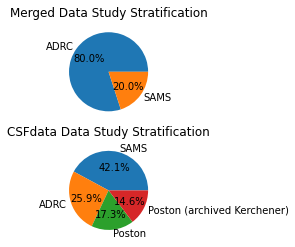

In [ ]:
import matplotlib.pyplot as plt

#figure on the studies contained in these three files

fig, axs = plt.subplots(2)

axs[0].pie(mergedDF["Study"].value_counts(), autopct = "%.1f%%", labels = list(mergedDF["Study"].value_counts().index.values))
axs[0].set_title("Merged Data Study Stratification")

axs[1].pie(CSFdata["Study"].value_counts(), autopct = "%.1f%%",labels = CSFdata["Study"].value_counts().index.values)
axs[1].set_title("CSFdata Data Study Stratification")

#Merging this file with the plasma metadata file

In [ ]:
#merging this merged dataframe with the plasma metadata file

mergedDF["SampleId"] = mergedDF["PIDN"]

plasma_meta = pd.read_csv("/content/Plasma_metadata_FINAL_052021_ADRC_additionalQC(2).csv")


In [ ]:
sum2 = 0
for entry in mergedDF["SampleId"]:
  if entry not in plasma_meta["SampleId"]:
    sum2 +=1
    print(entry)



In [ ]:
mergedDF["SampleId"] = mergedDF["SampleId"].astype(int)

newplasma = plasma_meta

for i in range(0,len(newplasma)):
  while True:
    try:
     newplasma.at["SampleId", i] = int(newplasma["SampleId"][i])
    except:
      newplasma = newplasma.drop(i)


In [ ]:
mergeDF = pd.merge(mergedDF, plasma_meta, on='SampleId')

#Merge MCI data with the inital merged file

In [ ]:
import pandas as pd

cleanMCI = pd.read_csv("/content/out_d1_req_mci_ids_0709_splitlabels-2.csv", index_col = 0)

In [ ]:
cleanMCI

In [ ]:
cleanMCI["ADRC ID"] = cleanMCI["MCI-ADRCID"].astype(float)

In [ ]:
#dropping the wave 2 entries here
mergedDFW1 = mergedDF[mergedDF["Wave_Num"] != 2]

In [ ]:
mergedDFwMCI = pd.merge(mergedDF, cleanMCI, on='ADRC ID')

#PCA Analysis

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

#run PCA on the CSF_amyloid data

cleanmergedDFwMCI = mergedDFwMCI[mergedDFwMCI["Harmonized Set"] == 1]

features = cleanmergedDFwMCI.iloc[:, 9:13].values
features = StandardScaler().fit_transform(features) 


pca= PCA(n_components=2)
pca_results = pca.fit_transform(features)

principal_DF = pd.DataFrame(data = pca_results
             , columns = ['principal component 1', 'principal component 2'])

In [ ]:
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=20)
plt.ylabel('Principal Component - 2',fontsize=20)
plt.title("Principal Component Analysis of Merged Dataset",fontsize=20)
targets = cleanmergedDFwMCI.label_1_name.value_counts().index.values
colors = ['r', 'g',"b","yellow", "pink", "black"]
for target, color in zip(targets,colors):
    indicesToKeep = cleanmergedDFwMCI['label_1_name'] == target
    plt.scatter(principal_DF.loc[indicesToKeep, 'principal component 1']
               , principal_DF.loc[indicesToKeep, 'principal component 2'], c = color, s = 50)

plt.legend(targets,prop={'size': 10})

In [ ]:
dxCSFdata = CSFdata[CSFdata["Dx"] != ""]
dxCSFdata = dxCSFdata[dxCSFdata["Dx"].astype(str) != "nan" ]
dxCSFdata = dxCSFdata[dxCSFdata["CSF P-Tau181"].astype(str) != "nan" ]
dxCSFdata = dxCSFdata[dxCSFdata["CSF Total Tau"].astype(str) != "nan" ]
dxCSFdata = dxCSFdata[dxCSFdata["CSF AB42"].astype(str) != "nan" ]
dxCSFdata = dxCSFdata[dxCSFdata["CSF AB40"].astype(str) != "nan" ]
dxCSFdata = dxCSFdata[dxCSFdata["CSF AB42/AB40"].astype(str) != "nan" ]

In [ ]:
dxCSFdata

In [ ]:
features = dxCSFdata.iloc[:, 9:14].values
features = StandardScaler().fit_transform(features) 


pca= PCA(n_components=3)
pca_results = pca.fit_transform(features)

principal_DF = pd.DataFrame(data = pca_results
             , columns = ['principal component 1', 'principal component 2', "pca3"])

In [ ]:
dxCSFdata = dxCSFdata.reset_index()

In [ ]:
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))


Explained variation per principal component: [0.44484161 0.33245874 0.15230581]


In [ ]:
from mpl_toolkits import mplot3d

fig = plt.figure()
plt.figure(figsize=(10,10))

ax = plt.axes(projection = '3d')

plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=20)
plt.ylabel('Principal Component - 2',fontsize=20)
plt.title("Principal Component Analysis of Merged Dataset",fontsize=20)
targets = dxCSFdata.Dx.value_counts().index.values
colors = ['r', 'g',"b", "c", "m", "y", "b", "pink", "gray", "orange"]
for target, color in zip(targets,colors):
    indicesToKeep = dxCSFdata['Dx'] == target
    ax.scatter3D(principal_DF.loc[indicesToKeep, 'principal component 1']
               , principal_DF.loc[indicesToKeep, 'principal component 2'],principal_DF.loc[indicesToKeep, 'pca3'], c = color, s = 50)

plt.legend(targets,prop={'size': 10})

In [ ]:
import pandas as pd

csfprot = pd.read_csv("/content/CSFProts.log10.noLODFilter(1).csv")
mcidata = pd.read_csv("/content/out_d1_req_mci_ids_0709_splitlabels-2.csv")
plasmaprot = pd.read_csv("/content/plasmaProts.log10.csv")

In [ ]:
plasmaprot

In [ ]:
csfprot = csfprot.dropna(subset=['SampleId'])
csfprotint = csfprotint.loc[csfprot['SampleId'].str.match('^[+-]?\d+$', na=False)]

In [ ]:
csfprotint["SampleId"]  = csfprotint["SampleId"].astype(int)

In [ ]:
csfprotint.columns

In [ ]:
mcidata["SampleId"] = mcidata["MCI-ADRCID"]

In [ ]:
for i in mcidata["SampleId"]:
  if i in csfprotint["SampleId"]:
    print("yes")

In [ ]:
csfMCI = pd.merge(csfprotint, mcidata, on='SampleId')

In [ ]:
csfMCI

In [ ]:
merded = pd.read_csv("/content/mergedentries.csv")

In [ ]:
merded

In [ ]:
mcidata["ADRC_ID"] = mcidata["MCI-ADRCID"].astype(float)
mergedDFwMCI = pd.merge(merded, mcidata, on='ADRC ID')

In [ ]:
import pandas as pd
plasmaMeta = pd.read_csv("/content/Plasma_metadata_FINAL_052021_ADRC_additionalQC(2).csv")

In [ ]:
plasmaMeta = plasmaMeta[(plasmaMeta["Study"] == "ADRC") & (plasmaMeta["Diagnosis_group"] == "MCI")]

In [ ]:
plasmaMCI = plasmaMeta[plasmaMeta["Diagnosis_group"] == "MCI"]

In [ ]:
plasmaMCI["Study"].value_counts()

ADRC    133
Name: Study, dtype: int64

In [ ]:
neededIDs = set(plasmaMeta["ADRC_ID"])

In [ ]:
mci = pd.read_csv("/content/out_d1_req_mci_ids_0709_splitlabels-2.csv")

In [ ]:
mcidata["ADRC_ID"] = mcidata["MCI-ADRCID"].astype(float)

plamsmaMetaMCI = pd.merge(plasmaMeta, mcidata, on='ADRC_ID')

In [ ]:
plamsmaMetaMCI = plamsmaMetaMCI.dropna(subset=['SampleID'])
plamsmaMetaMCIint = plamsmaMetaMCI.loc[plamsmaMetaMCI['SampleID'].str.match('^[+-]?\d+$', na=False)]
plamsmaMetaMCIint["SampleID"]  = plamsmaMetaMCIint["SampleID"].astype(int)

In [ ]:
csfprotint["SampleID"] = csfprotint["SampleId"]
protsMerge = pd.merge(plamsmaMetaMCIint, csfprotint, on='SampleID')

In [ ]:
cols = list(protsMerge.columns)

In [ ]:
for i in range(0,len(cols)):
  if cols[i] == "CRYBB2.10000.28.3":
    print(i)

85


In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

#run PCA on the CSF_amyloid data


features = protsMerge.iloc[:, 85:].values
features = StandardScaler().fit_transform(features) 


pca= PCA(n_components=3)
pca_results = pca.fit_transform(features)

principal_DF = pd.DataFrame(data = pca_results
             , columns = ['principal component 1', 'principal component 2', 'principal component 3'])

<Figure size 432x288 with 0 Axes>

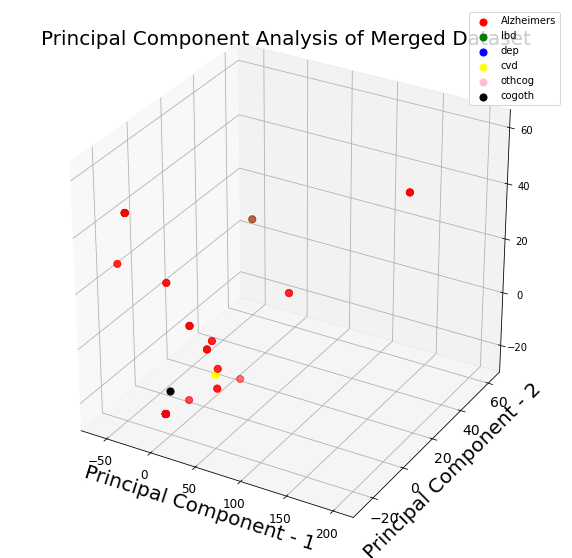

In [ ]:
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt

fig = plt.figure()
plt.figure(figsize=(10,10))

ax = plt.axes(projection = '3d')

plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=20)
plt.ylabel('Principal Component - 2',fontsize=20)
plt.title("Principal Component Analysis of Merged Dataset",fontsize=20)
targets = protsMerge.label_1_name.value_counts().index.values
colors = ['r', 'g',"b","yellow", "pink", "black"]
for target, color in zip(targets,colors):
    indicesToKeep = protsMerge['label_1_name'] == target
    ax.scatter3D(principal_DF.loc[indicesToKeep, 'principal component 1']
               , principal_DF.loc[indicesToKeep, 'principal component 2'],principal_DF.loc[indicesToKeep, 'principal component 3'], c = color, s = 50)

plt.legend(targets,prop={'size': 10})

In [ ]:
principal_DF

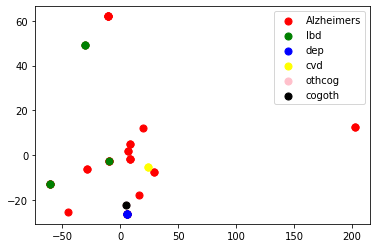

In [ ]:
for target, color in zip(targets,colors):
    indicesToKeep = protsMerge['label_1_name'] == target
    plt.scatter(principal_DF.loc[indicesToKeep, 'principal component 1']
               , principal_DF.loc[indicesToKeep, 'principal component 2'], c = color, s = 50)

plt.legend(targets,prop={'size': 10})